# Python | Урок 2: визуализация данных

## Загрузка необходимых библиотек

Для работы нам понадобятся две библиотеки:
1. `pandas`: при помощи нее мы считаем из файла таблицу с данными
2. `matplotlib`: библиотека для визуализации данных
3. `seaborn`: по сути matplotlib на максималках - позволяет легко делать сложные визуализации

In [3]:
# Подключаем нужные библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
# Для чтения данных используем метод read_csv
table = pd.read_csv('dota2_skill_train.csv', index_col='id')

Посмотрим на данные

In [5]:
table.head()

,skilled,player_team,winner_team,duration,pre_game_duration,first_blood_time,first_blood_claimed,hero_id,hero_pick_order,leaver_status,...,avg_deaths_x16,avg_assists_x16,avg_gpm_x16,avg_xpm_x16,best_kills_x16,best_assists_x16,best_gpm_x16,best_xpm_x16,win_streak,best_win_streak
id,,,,,,,,,,,,,,,,,,,,,
7,1,dire,dire,2140,90,129,0,90,9,0,...,8,15,352,430,10,30,551,745,2,5
8,0,radiant,radiant,2138,90,174,0,5,5,0,...,9,19,294,425,13,37,445,717,2,12
12,0,radiant,radiant,3547,90,360,0,81,7,0,...,7,9,493,543,23,18,691,762,3,3
13,1,dire,radiant,1878,90,28,0,74,9,0,...,7,12,515,583,25,34,869,935,0,6
14,1,dire,radiant,2232,90,129,0,14,6,0,...,10,16,337,452,34,43,672,797,0,9


Очень часто важно понимать какие значения принимает признак. Для ответа на этот вопрос нам поможет [гистограмма](https://ru.wikipedia.org/wiki/%D0%93%D0%B8%D1%81%D1%82%D0%BE%D0%B3%D1%80%D0%B0%D0%BC%D0%BC%D0%B0).

Гистограмма выглядит следующим образом:
- На оси **х** располагаются значения признака
- А на оси **y** - количество строк с таким значением признака

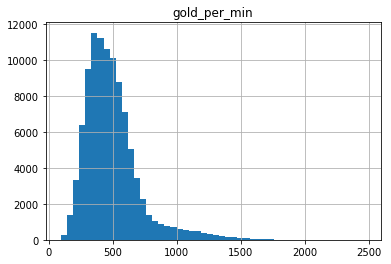

In [8]:
# Берем колонку gold_per_min - скорость зарабатывания золота
# Строим график используя метод hist датафрейма table
table.hist('gold_per_min', bins=50);

Из гистограммы видно, что скорость зарабатывания золота принимает значения больше `1500` довольно редко. Сохраним в данных только те строки, где **gold_per_min** меньше `1500`.

In [9]:
# Сделаем новую таблицу, сокращенную
table_truncated = table.query('gold_per_min < 1500')

Давайте сравним размеры нового и исходного датафреймов

In [10]:
# Для этого используем метод shape - он показывает сколько строк и столбцов содержатся в датафрейме
print("Размер table: ", table.shape)
print("Размер table_truncated: ", table_truncated.shape)

Размер table:  (99871, 57)
Размер table_truncated:  (99535, 57)


Теперь гистограмма выглядит иначе

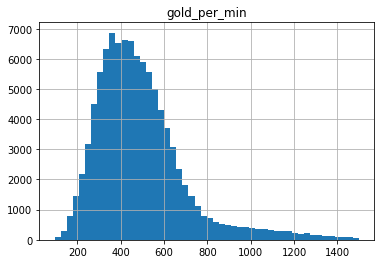

In [12]:
# Строим график методом hist нового датафрейма table_truncated
table_truncated.hist('gold_per_min', bins=50);

**Совмещение нескольких гистограмм на одном графике позволяет обнаруживать закономерности в данных.**

Например, рассмотрим показатель `gold` (число золота на момент игры), зависит ли чило золота от опыта игрока? 

Если нарисовать гистограммы `gold` для опытных игроков (голубой цвет) и для новичков (оранжевый), можно видеть существенное отличие гистограмм друг от друга, что намекает на наличие связи между опытом и количеством золота.

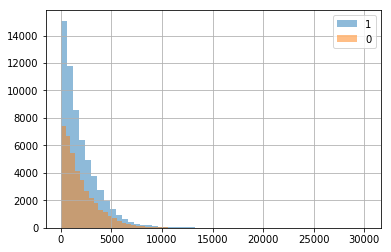

In [13]:
# Подготовим нужные выборки методом groupby
# groupby группирует данные по значениям категориальной переменной, 
# что позволяет рисовать несколько графиков на одной картинке

table_truncated.groupby('skilled')['gold'].hist(alpha=0.5, bins=50)
plt.legend(table_truncated['skilled'].unique());

Также метод groupby позволяет на ходу считать средние. Вот пример подсчета средних значений `gold` на разных уровнях категориальной переменной `skilled`.

In [14]:
table_truncated.groupby('skilled')['gold'].mean()

skilled
0    1947.379907
1    1933.366405
Name: gold, dtype: float64

Сейчас вам кажется, что они почти одинаковы. И среднее количество золота у неопытных игроков даже больше - довольно странно, не правда ли?  

И тут датасайентистам на помощь приходит **медиана** - это значение, расположенное посередине всей выборки. Половина всех возможных значение признака (в нашем случае gold) больше нее, а половина меньше. Это более информативный показатель, чем **среднее арифметическое** (mean). 

In [15]:
table_truncated.groupby('skilled')['gold'].median()

skilled
0    1398
1    1411
Name: gold, dtype: int64

Как видите, у опытных игроков "середина" имеет большее значение, чем у неопытных - что уже совсем не противоречит здравому смыслу!

### Проверим гипотезу

Поскольку герои в игре развиваются с течением времени, зарабатывая золото и опыт, естественным образом возникает вопрос:   
"Зависит ли скорость зарабатывания золота от скорости приобретения опыта, если да, то как?"

Чтобы ответить на этот вопрос, достаточно построить график зависимости золота от опыта. В этом нам поможет [диаграмма рассеяния](https://ru.wikipedia.org/wiki/Диаграмма_рассеяния) (eng.: Scatter Plot), которая строится следующим образом:
- Берется одна строка из таблицы данных
- Значение показателя `xp_per_min` откладывается по оси x
- Значение показателя `gold_per_min` откладывается по оси y
- В результате получается точка на плоскости
- Алгоритм повторяется для всех строк в данных

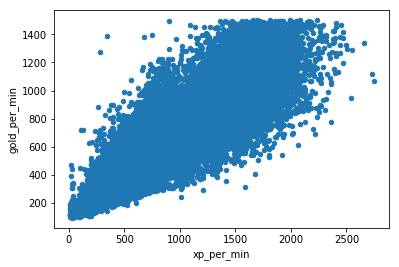

In [16]:
# Диаграмму можно легко построить с помощью встроенной функции plot библитеки pandas
table_truncated.plot(kind='scatter', x='xp_per_min', y='gold_per_min');

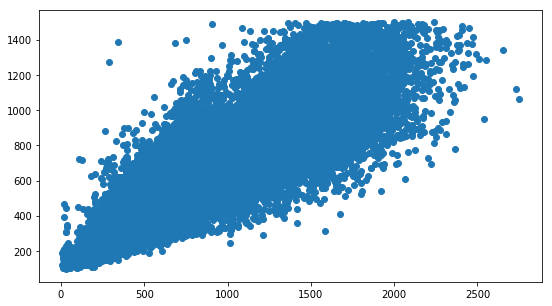

In [17]:
# Либо с помощью matplotlib:
# - figure - создает пустой холст
# - scatter - наносит точки на холст
# - show - отображает картинку

plt.figure(figsize=(9, 5))
plt.scatter(table_truncated['xp_per_min'], table_truncated['gold_per_min']);

Из графика легко видеть, что между признаками **'xp_per_min'** и **'gold_per_min'** есть зависимость, причем линейная, т.е. существует формула
$$gold = k \cdot xp + b,$$
где k и b - некоторые числовые константы.

Для того, чтобы посмотреть на взаимосвязь двух численных признаков в подробностях, у seaborn есть **joint plot** — это гибрид **scatter plot** и **histogram**. 

А если указать параметр kind = 'reg', то seaborn нарисует ту самую **линию**, которая покажет **линейную зависимость** обнаруженную нами на предыдущем графике.

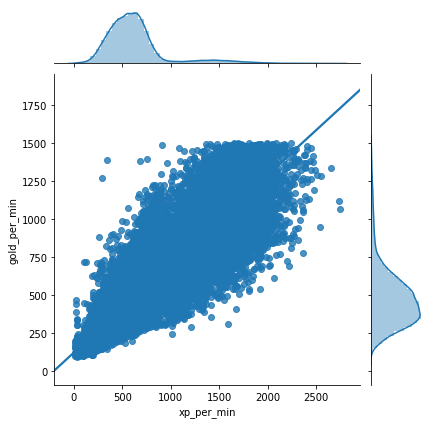

In [18]:
sns.jointplot(x='xp_per_min', y='gold_per_min', data = table_truncated, kind = 'reg');